# Agenda
- Vokabular
- Reichhaltigkeit
- Filtern nach Länge
- Frequency distribution
- Bigrams 
- Concordance
- Ähnlichkeit
- Dispersionsplot
- Wordcloud 2.0

In [1]:
import nltk

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Vokabular
- Wie groß ist das Vokabular von Moby Dick?

In [3]:
a = [1,3,3,5]
len(set(a))

3

In [4]:
len(set(text1))

19317

- Das von Sense and Sensibility von Jane Austen?

In [5]:
len(set(text2))

6833

In [6]:
from nltk.corpus import udhr
nltk.download("punkt")
sample = (" ").join(udhr.words("German_Deutsch-Latin1"))
tokens = nltk.word_tokenize(sample)
menschenrechtserklaerungs_text = nltk.Text(tokens)
len(set(menschenrechtserklaerungs_text))

[nltk_data] Downloading package punkt to /Users/plotti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


578

# Reichhaltigkeit
- Welcher text ist am reichhaltigesten d.h. das größte Vokabular pro Wort?
- Maximaler Quotient ist 1: 100 verschiedene wörter / 100 wörter insgesammt = 1

In [7]:
# Moby Dick
len(set(text1)) / float(len(text1))

0.07406285585022564

In [8]:
# Jane Austen
len(set(text2)) / float(len(text2))

0.04826383002768831

In [9]:
# Menschenrechtserklärung
len(set(menschenrechtserklaerungs_text)) / float(len(menschenrechtserklaerungs_text))

0.3797634691195795

Anscheinend ist die Menschenrechtserklärung am reichhaltigsten oder am kompliziertesten? Es ist kein fairer Vergleich :) 

# Filtern 
- nach Wörtern bestimmter länge

In [10]:
# Moby Dick
V = set(text1)
long_words = [w for w in V if len(w) > 18]
sorted(long_words)

['uninterpenetratingly']

In [11]:
# Menschenrechtserklärung
V = set(menschenrechtserklaerungs_text)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['Arbeitsbedingungen',
 'Arbeitslosigkeit',
 'Beeinträchtigungen',
 'Berufsschulunterricht',
 'Berücksichtigung',
 'Generalversammlung',
 'Glaubensfreiheit',
 'Gleichberechtigung',
 'Grundschulunterricht',
 'Hochschulunterricht',
 'Lebensbedingungen',
 'Meinungsfreiheit',
 'Meinungsäußerung',
 'Nichtanerkennung',
 'Religionsfreiheit',
 'Staatsangehörigkeit',
 'Staatsanghörigkeit',
 'Unterhaltsmittel',
 'freundschaftlicher',
 'innerstaatlichem',
 'innerstaatlichen',
 'nichtpolitischer',
 'strafrechtlichen',
 'uneingeschränkter',
 'unveräußerlichen',
 'wirtschaftlichen',
 'zusammenzuschließen']

- nach Länge und Frequenz

In [12]:
fdist1 = FreqDist(text1)
fdist1

FreqDist({',': 18713, 'the': 13721, '.': 6862, 'of': 6536, 'and': 6024, 'a': 4569, 'to': 4542, ';': 4072, 'in': 3916, 'that': 2982, ...})

In [13]:
# Wörter die in Moby Dick mind. 12 buchstaben lang sind und mind. 8 mal vorkommen
sorted(w for w in set(text1) if len(w) > 12 and fdist1[w] > 8)

['Mediterranean',
 'circumstances',
 'consternation',
 'indispensable',
 'involuntarily',
 'peculiarities',
 'perpendicular',
 'simultaneously',
 'superstitious',
 'unaccountable']

# Verteilung
- Welches Wort kommt in Moby Dick am häufigsten vor?
- https://www.youtube.com/watch?v=rF-hq_CHNH0 :) 

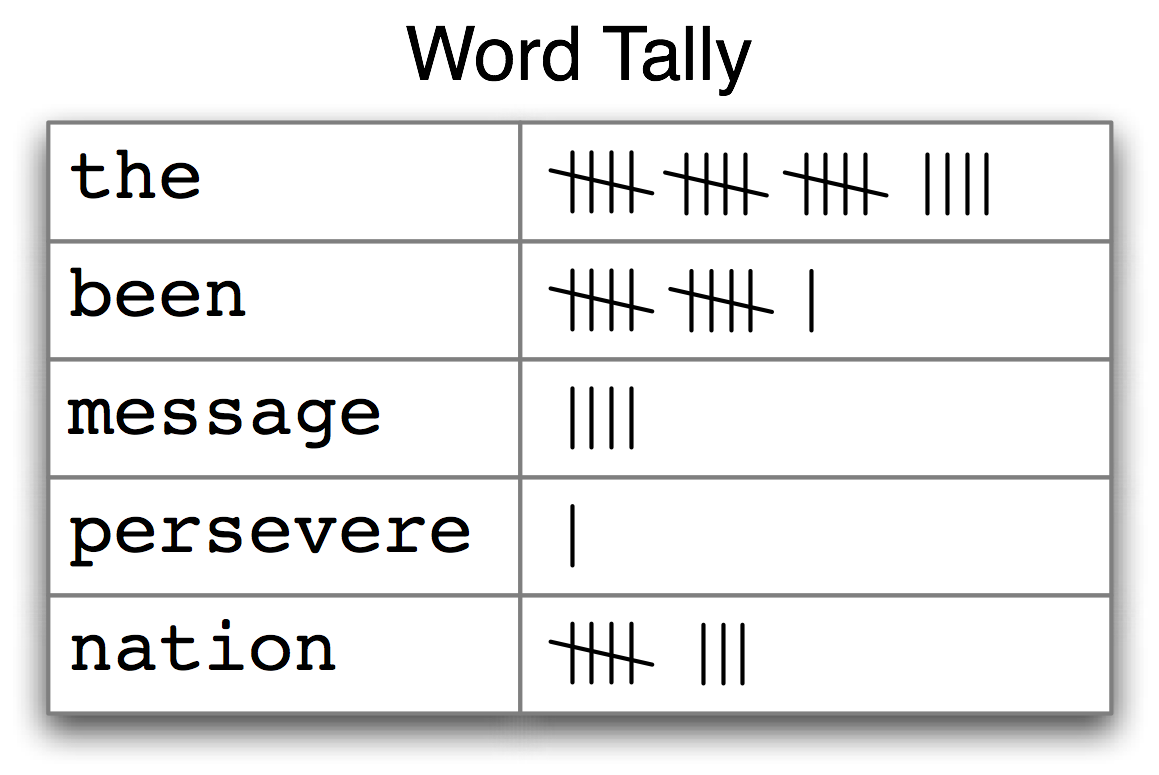

In [14]:
from IPython.display import Image
Image("frequency.png")

In [15]:
fdist = FreqDist(text1)
fdist

FreqDist({',': 18713, 'the': 13721, '.': 6862, 'of': 6536, 'and': 6024, 'a': 4569, 'to': 4542, ';': 4072, 'in': 3916, 'that': 2982, ...})

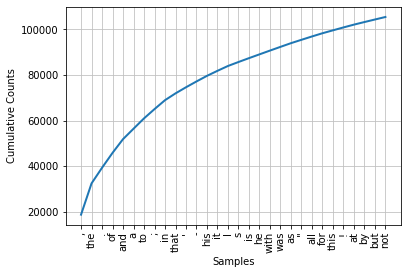

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [16]:
fdist.plot(30, cumulative=True)

- Jedes zusätzliche Wort kommt immer weniger oft vor (diminishing returns)
- Welches Wort kommt in meinem Satz am häufigsten vor?

In [17]:
sample = '''Ich war heute im wald spazieren und sah ein reh. Wobeich ich nicht sicher war ob es ein Reh war oder ein Geist.'''

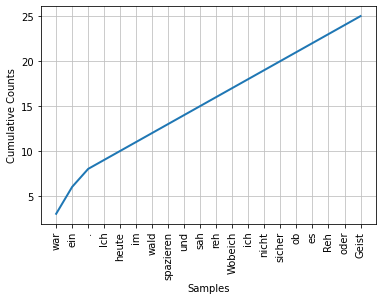

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [20]:
tokens = nltk.word_tokenize(sample)
text = nltk.Text(tokens)
fdist = FreqDist(text)
fdist.plot(30, cumulative=True)

In [21]:
fdist

FreqDist({'war': 3, 'ein': 3, '.': 2, 'Ich': 1, 'heute': 1, 'im': 1, 'wald': 1, 'spazieren': 1, 'und': 1, 'sah': 1, ...})

### Aufgabe
- Erzeugt eigenen Text oder kopiert ihn aus dem Internet und zählt welche Wörter am häufigsten vorkommen, sind die ersten 3 Positionen bei Euch ähnlich?

# Bigrams
- Welche Wörter kommen häufig zusammen vor?
- https://www.youtube.com/watch?v=h8MVXC_hqNY

In [22]:
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


In [27]:
menschenrechtserklaerungs_text.collocations()

das Recht; Jeder hat; hat das; Niemand darf; Recht auf; Anspruch auf;
Vereinten Nationen; dem Gesetz; auf Grund; Alle Menschen; strafbaren
Handlung; auf gleichen; Allgemeine Erklärung; wegen einer; gegen jede;
der Menschenrechte; notwendig ist; des Landes; diese Erklärung; hat
Anspruch


### Advanced Trigrams

- Bigramme mit Frequenz in der Menschenrechtserklärung

In [30]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = BigramCollocationFinder.from_words(menschenrechtserklaerungs_text)
finder.apply_freq_filter(2) # reduce to bigrams that appeared at least 3 times
finder.nbest(bigram_measures.pmi, 10) 

[(u'es', u'notwendig'),
 (u'strafbaren', u'Handlung'),
 (u'im', u'Falle'),
 (u'Allgemeine', u'Erkl\xe4rung'),
 (u'Vereinten', u'Nationen'),
 (u';', u'dieses'),
 (u'dem', u'Gesetz'),
 (u'da', u'es'),
 (u'wegen', u'einer'),
 (u'des', u'Landes')]

- Trigramme in der Menschenrechtserklärung
- mehr Beispiele unter http://www.nltk.org/howto/collocations.html

In [32]:
finder = TrigramCollocationFinder.from_words(menschenrechtserklaerungs_text)
finder.apply_freq_filter(3) # reduce to bigrams that appeared at least 3 times
finder.nbest(trigram_measures.pmi, 10)

[(u'hat', u'das', u'Recht'),
 (u'Jeder', u'hat', u'das'),
 (u'.', u'Niemand', u'darf'),
 (u'das', u'Recht', u'auf'),
 (u'hat', u'Anspruch', u'auf'),
 (u'Jeder', u'hat', u'Anspruch'),
 (u'werden', u'.', u'Artikel'),
 (u'.', u'Jeder', u'hat'),
 (u',', u'da', u'die'),
 (u'das', u'Recht', u',')]

# Übereinstimmungen oder Konkordanz

- In welchem Kontext steht überall "monstrous" im Text bei Moby Dick?

In [33]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


- In welchem Kontext kommen Menschenrechte in der Menschenrechtserklärung vor?

In [35]:
menschenrechtserklaerungs_text.concordance("Recht")

Displaying 25 of 25 matches:
kt ist ist . Artikel 3 Jeder hat das Recht auf Leben , Freiheit und Sicherheit 
fen werden . Artikel 6 Jeder hat das Recht , überall als rechtsfähig anerkannt 
 Handlung beschuldigt wird , hat das Recht , als unschuldig zu gelten , solange
nnerstaatlichem oder internationalem Recht nicht strafbar war . Ebenso darf kei
htigungen . Artikel 13 Jeder hat das Recht , sich innerhalb eines Staates frei 
tsort frei zu wählen . Jeder hat das Recht , jedes Land , einschließlich seines
kzukehren . Artikel 14 Jeder hat das Recht , in anderen Ländern vor Verfolgung 
l zu suchen und zu genießen . Dieses Recht kann nicht in Anspruch genommen werd
verstoßen . Artikel 15 Jeder hat das Recht auf eine Staatsangehörigkeit . Niema
igkeit willkürlich entzogen noch das Recht versagt werden , seine Staatsanghöri
sangehörigkeit oder der Religion das Recht zu heiraten und eine Familie zu grün
und Staat . Artikel 17 Jeder hat das Recht , sowohl allein als auch in Gemeinsc
bt werden .

## Ähnlichkeit: Welche Wörter benutzen den gleichen Kontext?
- Bei Moby Dick?

In [36]:
text1.similar("monstrous")

imperial subtly impalpable pitiable curious abundant perilous
trustworthy untoward singular lamentable few determined maddens
horrible tyrannical lazy mystifying christian exasperate


- Bei Jane Austen?

In [38]:
text2.similar("monstrous")

very exceedingly so heartily a great good amazingly as sweet
remarkably extremely vast


- In der Menschenrechtserkläreung?

In [45]:
menschenrechtserklaerungs_text.similar("Menschenrechte")

gesellschaft arbeitszeit gleichen organisation seine
grundschulunterricht ehe


## Dispersionsplot
- Welche Wörter kommen wann gemeinsam vor?

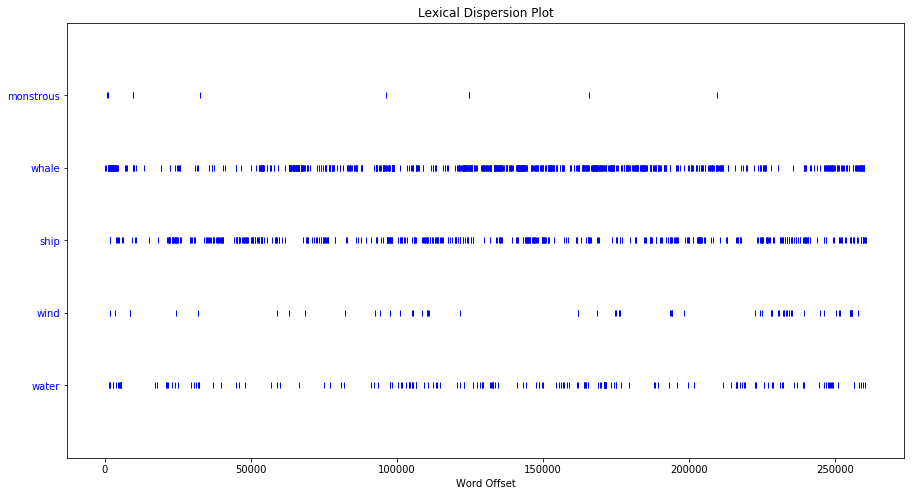

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
text1.dispersion_plot(["monstrous", "whale", "ship", "wind", "water"])

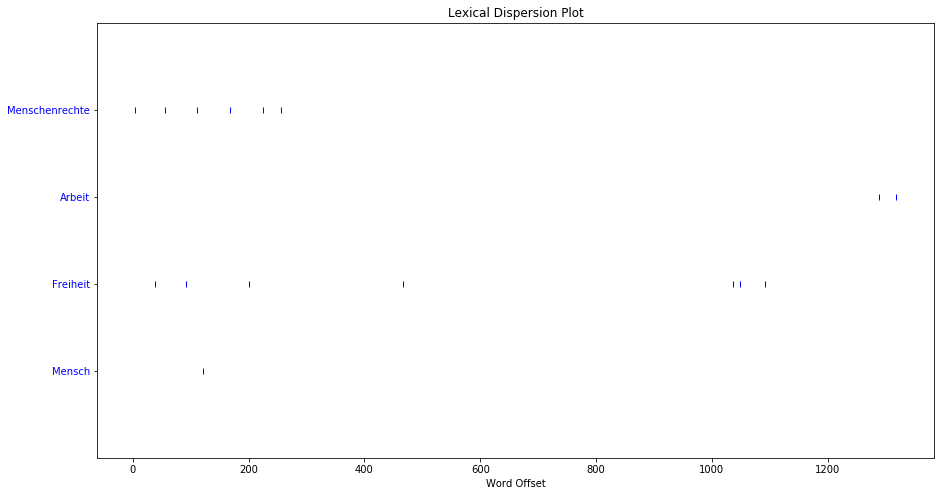

In [48]:
plt.figure(figsize=(15,8))
menschenrechtserklaerungs_text.dispersion_plot(["Menschenrechte", "Arbeit", "Freiheit", "Mensch"])

## Aufgabe:
- Probiert es mal mit einem Dispersionsplot für einen Text eurer Wahl. 